### Q1. Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

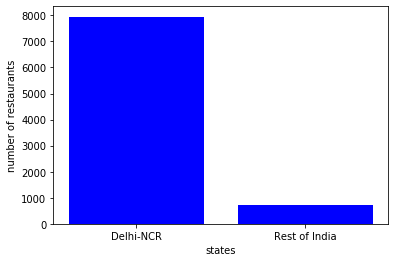

Delhi-NCR =  7947
ROI =  705


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json

dataframe=pd.read_csv('Datasets/zomato.csv', encoding='ISO-8859-1')
df=dataframe.copy()


#summarise all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR.
lst=['New Delhi', 'Ghaziabad', 'Noida', 'Gurgaon', 'Faridabad']
for i in lst:
    df.loc[df['City']==i, 'City']='Delhi-NCR'
    
#filtering and keeping all the indian cities in the data frame
#filtered data for all the indian cities/states
df=df.loc[df.Currency=='Indian Rupees(Rs.)']

#now in the filtered dataframe coping all the Columns in City field and storing it in np_city numpy array
cities=[]
for i in df['City']:
    cities.append(i)
np_city=np.array(cities)

#variables corresponding to the restaurants in delhi ncr and rest of India
count_delhi=0
roi=0
for i in np_city:
    if i=='Delhi-NCR':
        count_delhi+=1
    else:
        roi+=1

#plot a graph between number of restaurants present in delhi ncr and the rest of india.
plt.bar(['Delhi-NCR', 'Rest of India'], [count_delhi, roi], color='blue')
plt.xlabel('states')
plt.ylabel('number of restaurants')
plt.show()
print('Delhi-NCR = ', count_delhi)
print('ROI = ', other)

### Q2. Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.

In [5]:
#cleaning all the null values and keeping only non null values in the dataframe
df=df.loc[df.Cuisines.notnull()]

#list to append all the cuisines in delhi according to the dataset
in_delhi=[]
for i in df.loc[df['City']=='Delhi-NCR', 'Cuisines']:
    for j in i.split(','):
        in_delhi.append(j.strip())
        
# set to uniquely srote all the cuisine in Delhi 
in_delhi=set(in_delhi)

#a list corresponding to the all cuisines present in Rest of india.
other_states=[]
for i in df.loc[df['City']!='Delhi-NCR', 'Cuisines']:
    if i!=np.nan:
        for j in i.split(','):
            other_states.append(j.strip())
            
#A set to get all the unique cuisines in Rest of india
other_states=set(other_states)

#set difference to get all the cuisines which are present in all the other parts of india except new delhi.
not_in_delhi_ncr_acc_to_dataset=other_states-in_delhi 

#cuisines, other_states, in_delhi
not_in_delhi_ncr_acc_to_dataset
#according to the dataset these cuisines are not present in delhi.

{'BBQ', 'Cajun', 'German', 'Malwani'}

### Q3. Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

In [7]:
# api-key= f7a60b590c4af180fada73c0f68fe7c6
#city id of Delhi-NCR = 1

# Authentication for using zomato api
params={"user-key":"f7a60b590c4af180fada73c0f68fe7c6", "city_id":1}
headers={"accept":"application/json", "user-key":"f7a60b590c4af180fada73c0f68fe7c6"}
response=requests.get('https://developers.zomato.com/api/v2.1/cuisines', params=params, headers=headers)
data=response.json()

#cuisines present in delhi ncr according to the zomato api
cuisines_from_api_in_delhi=[]
for i in data['cuisines']:
    cuisines_from_api_in_delhi.append(i['cuisine']['cuisine_name'])
    
#set of all the uniques cuisines from the zomato api.
cuisines_from_api_in_delhi=set(cuisines_from_api_in_delhi)


# now we have two things 
# 1. cuisines_from_api_in_delhi          
# 2. not_in_delhi_ncr_acc_to_dataset

#print all those cuisines which are actually in delhi ncr but not mentioned in the dataset.
for i in cuisines_from_api_in_delhi:
    if i in not_in_delhi_ncr_acc_to_dataset:
        print(i)
#following is the list of those cuisines which are not in delhi_ncr according to the dataset. but these are actually available
#in delhi-ncr according to zomato api. 
# it is due to incomplete dataset.

BBQ
Malwani


### Q3. Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India. 

In [8]:
#Created two parts of this dataset
#the first part derived the top 10 cuisines served by maximum number of restaurants in Delhi NCR
#and in the second part the top 10 cuisines served by maximum number of restaurants in other indian states.

# Creating a dataframe copy
df=dataframe.copy()

#Manipulating dataframe
delh=['New Delhi', 'Ghaziabad', 'Noida', 'Gurgaon', 'Faridabad', 'Delhi-NCR']
for i in delh:
    df.loc[df['City']==i, 'City']='Delhi-NCR'
#taking indian cities only 
df=df.loc[df.Currency=='Indian Rupees(Rs.)']


#indicates all cuisines in delhi ncr only
all_cuisines=[]

# Ensuring any cuisinie value should not be null
df=df.loc[df.Cuisines.notnull()]

#all the city values as Delhi-NCR
df=df.loc[df['City']=='Delhi-NCR']
for i in df.Cuisines:
    for j in i.split(','):
        all_cuisines.append(j.strip())#saves all the cuisinies in the variable all_cuisines
    
#dictionary for saving no. of restaurants serving a particular cuisinie in delhi NCR
dic_delhi=dict()
for i in all_cuisines:
    if i in dic_delhi.keys():  #if already exist
        dic_delhi[i]+=1
    else:
        dic_delhi[i]=1 #Adding new entry

        
#from the dictionary the names and no. of restaurants in the variables times1
# no. of times the perticular cuisinie occured in the restaurant in delhi ncr
#cus1 is stores the names of all te cuisines. 
cus1=[]
times1=[]

#These are the variables to create a numpy array and use the numpy functions to sort them.
for i in dic_delhi.keys():
    cus1.append(i)
    times1.append(dic_delhi[i])
#apend all the dictionary values to the two lists.

#creat a numpy array out of those two lists
np_cus1=np.array(cus1)
np_times1=np.array(times1)
#sort the np arrays
np_cus1=np_cus1[np.argsort(np_times1)][::-1]
np_times1=np.sort(np_times1)[::-1]

print("The data corresponding to restaurants in Delhi-NCR")
for i in range(10):#printed
    print(np_cus1[i], ": ", np_times1[i])
print()

################################################################################################################
#this is the second part of the code.copied it from above and made some changes accordingly.
#created a new copy of the dataframe 
df=dataframe.copy()

lst=['New Delhi', 'Ghaziabad', 'Noida', 'Gurgaon', 'Faridabad', 'Delhi-NCR']
for i in lst:
    df.loc[df['City']==i, 'City']='Delhi-NCR'
df=df.loc[df.Currency=='Indian Rupees(Rs.)']
all_cuisines=[]
df=df.loc[df['City']!='Delhi-NCR']
for i in df.Cuisines:
    for j in i.split(','):
        all_cuisines.append(j.strip())
dic_other=dict()
for i in all_cuisines:
    if i in dic_other.keys():
        dic_other[i]+=1
    else:
        dic_other[i]=1
cus2=[]
times2=[]
for i in dic_other.keys():
    cus2.append(i)
    times2.append(dic_other[i])
np_cus2=np.array(cus2)
np_times2=np.array(times2)
np_cus2=np_cus2[np.argsort(np_times2)][::-1]
np_times2=np.sort(np_times2)[::-1]
print("The data corresponding to restaurants not in Delhi-NCR")
for i in range(10):
    print(np_cus2[i], ": ", np_times2[i])

The data corresponding to restaurants in Delhi-NCR
North Indian :  3597
Chinese :  2448
Fast Food :  1866
Mughlai :  933
Bakery :  697
South Indian :  569
Continental :  547
Desserts :  542
Street Food :  538
Italian :  535

The data corresponding to restaurants not in Delhi-NCR
North Indian :  349
Chinese :  242
Continental :  177
Italian :  147
Cafe :  136
Fast Food :  97
South Indian :  62
Mughlai :  59
Desserts :  55
Mexican :  50


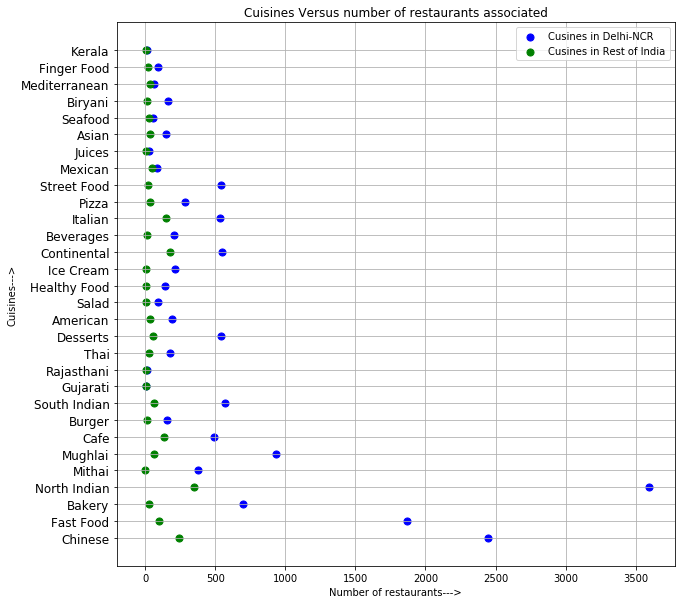

In [9]:
cusi=[]

#list containing number of restaurants with a particular cuisine in delhi
inside_delhi=[]
#list containing number of restaurants with a perticular cuisinie in rest of the indian states
inside_others=[]
for i in dic_delhi.keys():
    if i in dic_other:
        cusi.append(i)
        inside_delhi.append(dic_delhi[i])
        inside_others.append(dic_other[i])
plt.figure(figsize=(10, 10))
plt.scatter(inside_delhi[0:30], cusi[0:30], c='blue', s=50)
plt.scatter(inside_others[0:30], cusi[0:30], c='green', s=50)
plt.yticks(size=12)
plt.grid()
plt.xlabel('Number of restaurants--->')
plt.ylabel('Cuisines--->')
plt.title('Cuisines Versus number of restaurants associated')
plt.legend(['Cusines in Delhi-NCR', 'Cusines in Rest of India'])
plt.show()

### Q4. Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference.


# Analysis Report

From the above graph we can infer that "North Indian" cusinie is served in most number of restaurants of Delhi_NCR as well as other states with over 3500 restaurant in Delhi and nearly 500 in ROI. 
The above graph has only 30 important cusinies which are common in both Delhi-NCR and other states. 
There are some cusinies present in other states and are not present in any restaurant of Delhi-NCR. 
After North Indian cusinie, chinese cusinie takes second place with 2448 restaurants in Delhi-NCR and 242 in other states of india. 
Third most served cuisine is fast food with 1866 restaurants in Delhi_NCR and 97 in other states. 
After this we have Mughlai cusinie in Delhi-NCR with 933 restaurants and 59 in the states other than Delhi-NCR. and there are many more cusinies as show in the graph.
On the bottom side juices are the least served cuisine in Delhi as well as in ROI.